In [27]:
!pip install mlxtend

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, mean_absolute_error, precision_score, recall_score, f1_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve, auc
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.datasets import load_breast_cancer 

In [165]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


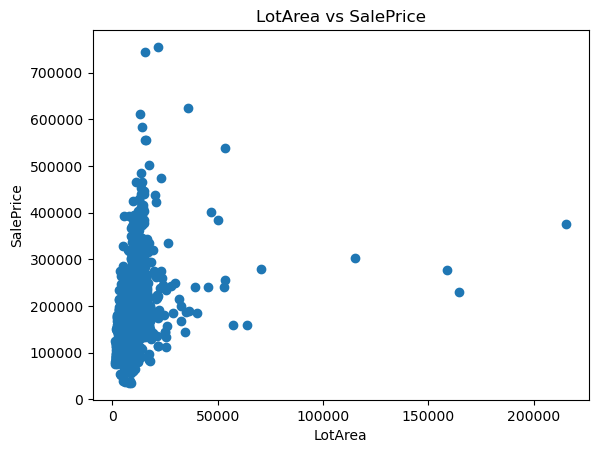

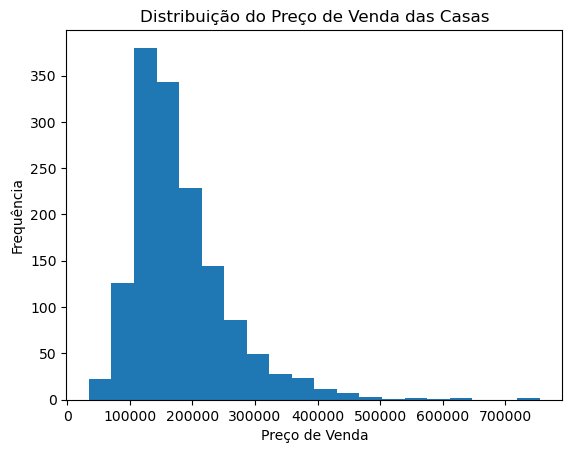

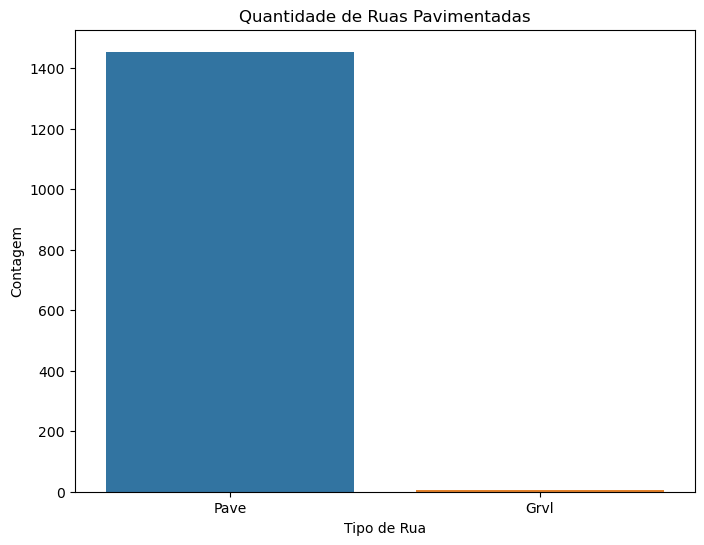

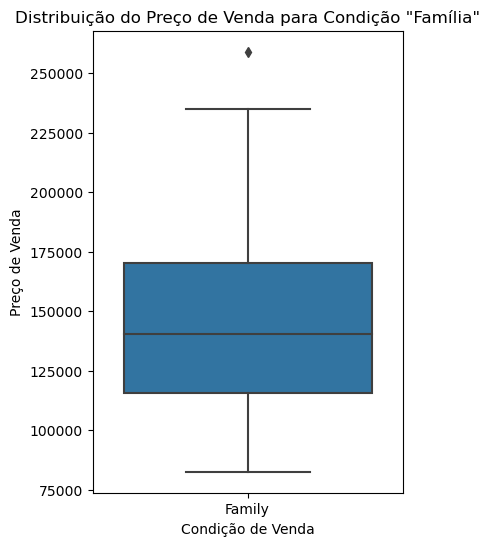

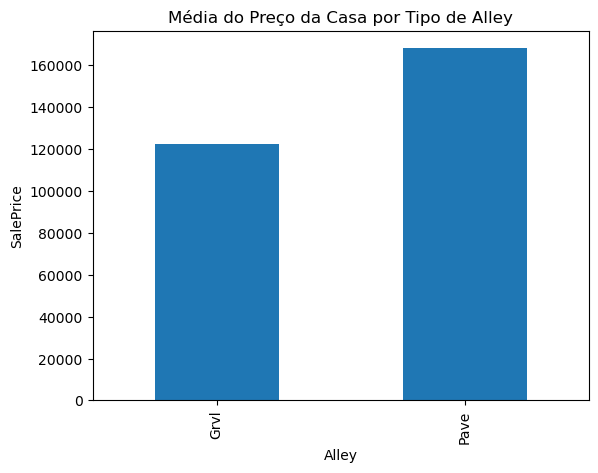

In [166]:
# 1. Análise exploratória de dados:

display(df.describe())

plt.scatter(df['LotArea'], df['SalePrice'])
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('LotArea vs SalePrice')
plt.show()

plt.hist(df['SalePrice'], bins=20)
plt.xlabel('Preço de Venda')
plt.ylabel('Frequência')
plt.title('Distribuição do Preço de Venda das Casas')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Street', data=df)
plt.xlabel('Tipo de Rua')
plt.ylabel('Contagem')
plt.title('Quantidade de Ruas Pavimentadas')
plt.show()

plt.figure(figsize=(4, 6))
sns.boxplot(x='SaleCondition', y='SalePrice', data=df[df['SaleCondition'] == 'Family'])
plt.xlabel('Condição de Venda')
plt.ylabel('Preço de Venda')
plt.title('Distribuição do Preço de Venda para Condição "Família"')
plt.show()

grouped_data = df[['Alley', 'SalePrice']].groupby('Alley')['SalePrice'].mean()

grouped_data.plot(kind='bar')
plt.xlabel('Alley')
plt.ylabel('SalePrice')
plt.title('Média do Preço da Casa por Tipo de Alley')
plt.show()

# Featuring Engineering:

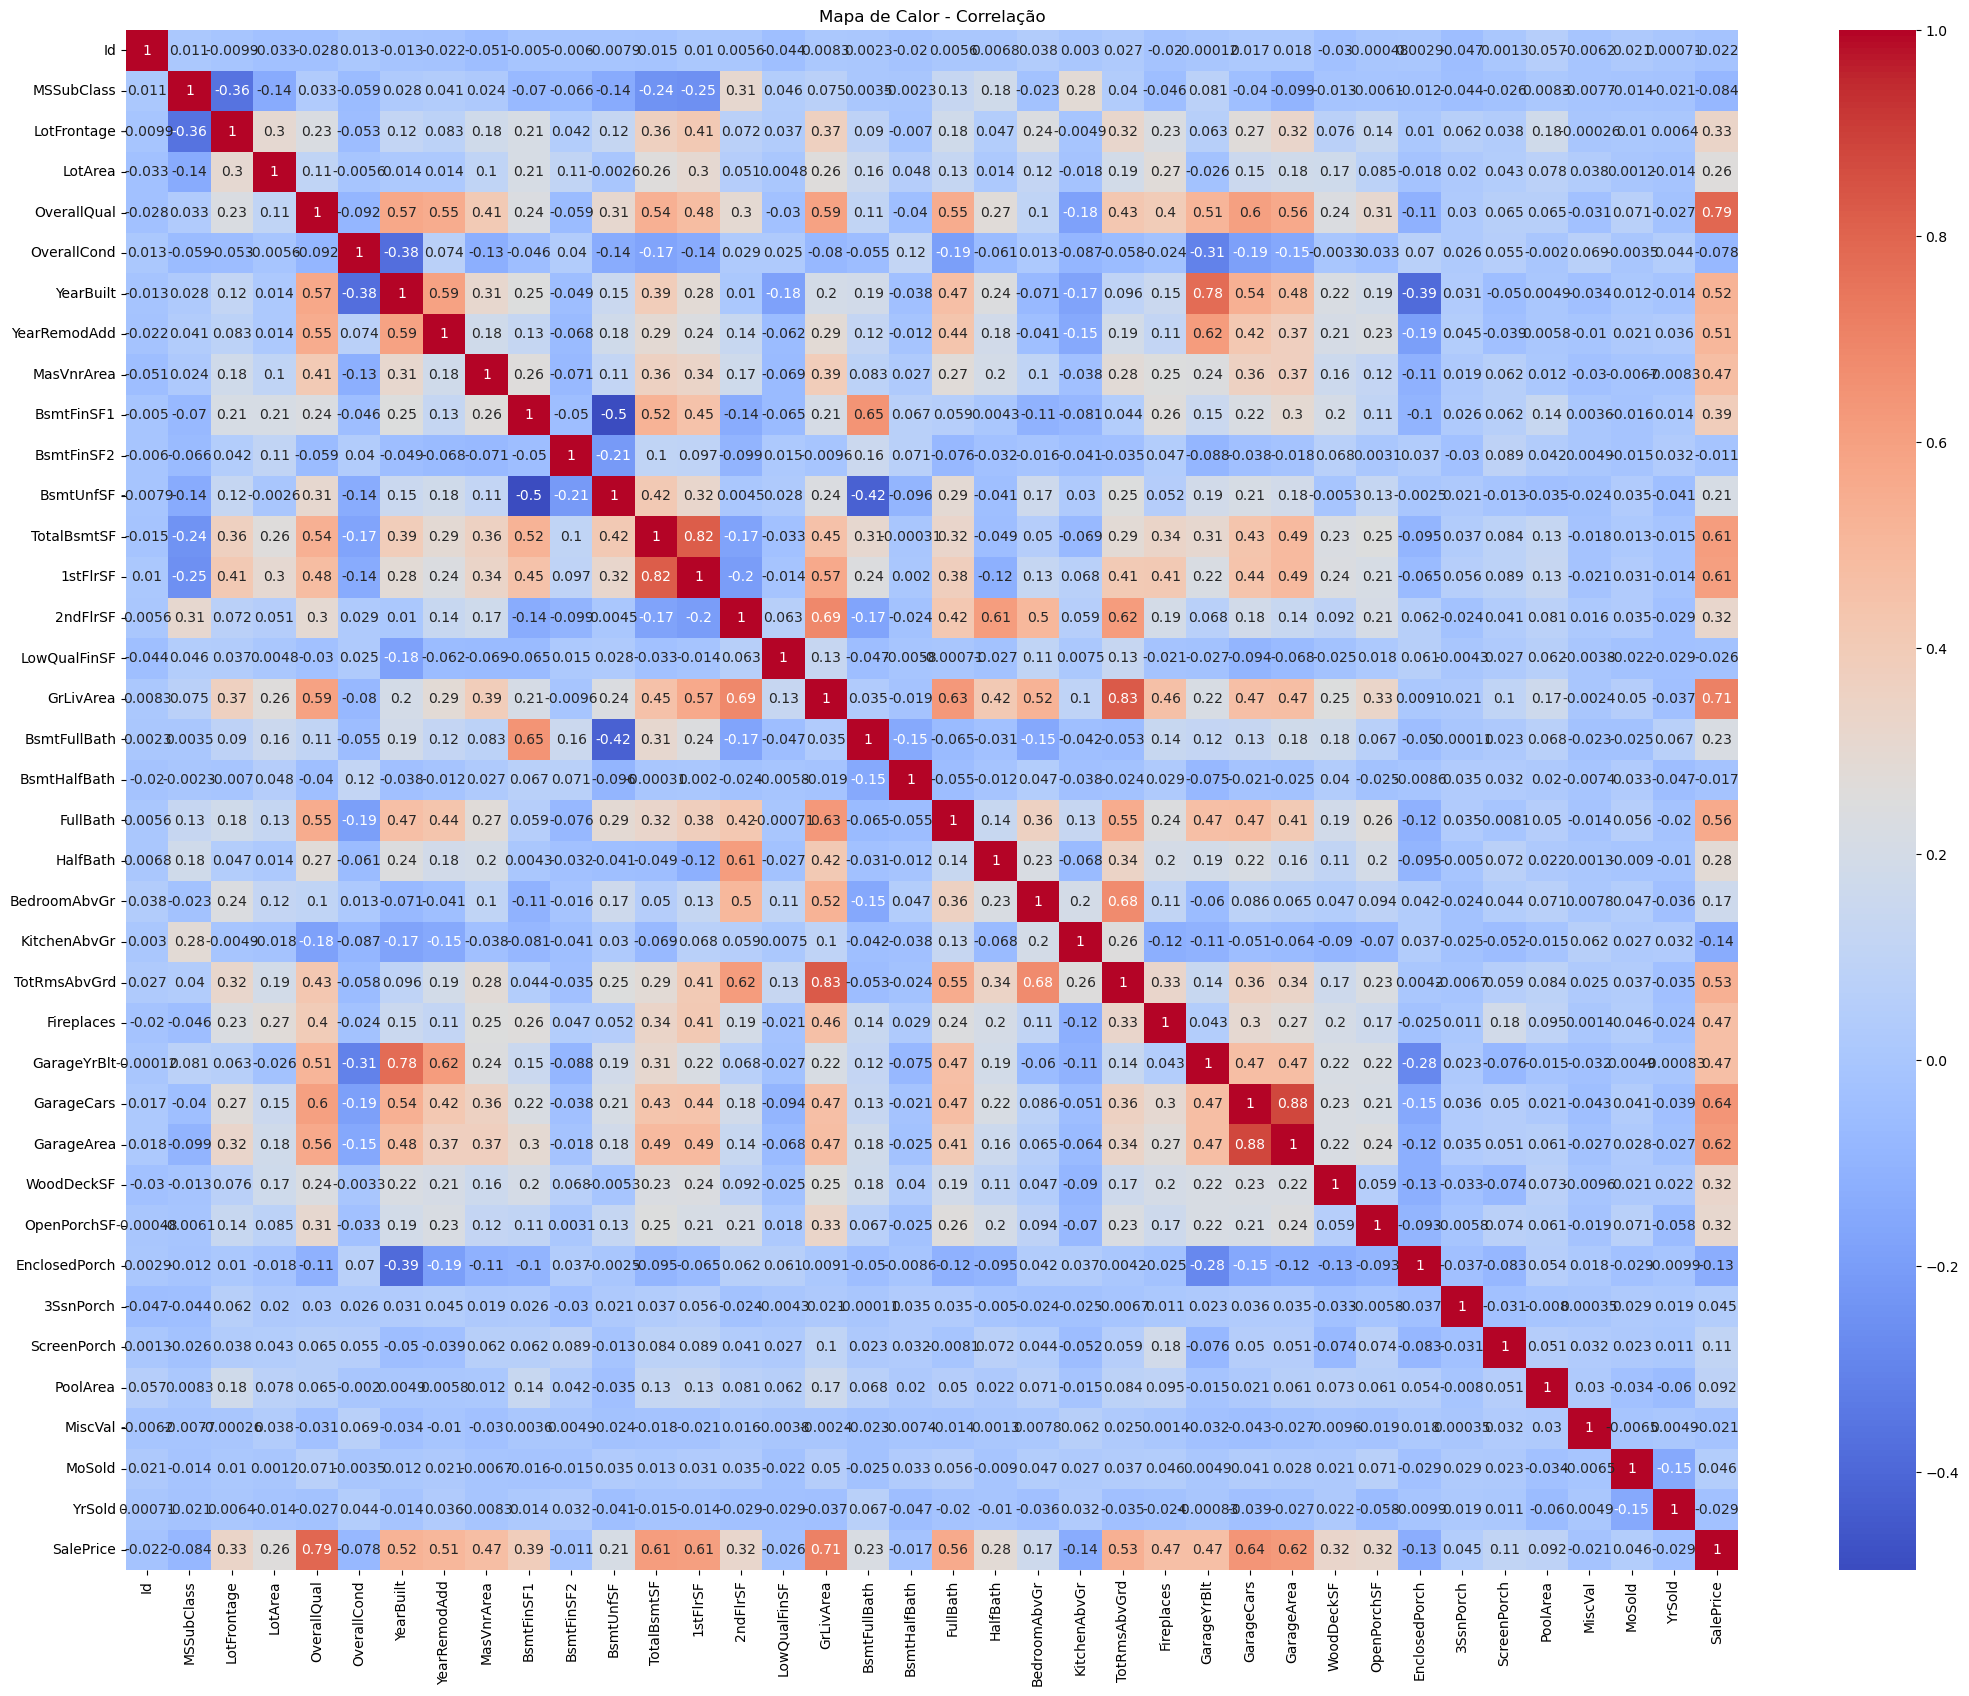

SelectKBest(k='all', score_func=<function f_regression at 0x0000012A793B5D30>)

In [167]:
# Variáveis mais importantes para o modelo de regressão.
numerical_collumns = df.select_dtypes(include='number')

numerical_collumns.fillna(numerical_collumns.median(), inplace=True)

correlation_matrix = numerical_collumns.corr()

plt.figure(figsize=(26, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor - Correlação')
plt.show()

X = numerical_collumns.drop('SalePrice', axis=1)
y = numerical_collumns['SalePrice']

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

In [168]:
feature_scores = pd.DataFrame({'Variável': X.columns, 'Pontuação': selector.scores_}).sort_values(by='Pontuação', ascending=False)

top_features = feature_scores.head(10)
display(top_features)

,Variável,Pontuação
4,OverallQual,2436.770591
16,GrLivArea,1470.585010
26,GarageCars,1013.705666
27,GarageArea,926.951287
12,TotalBsmtSF,880.341282
13,1stFlrSF,845.524488
19,FullBath,668.430296
23,TotRmsAbvGrd,580.762801
6,YearBuilt,548.665821
7,YearRemodAdd,504.714855


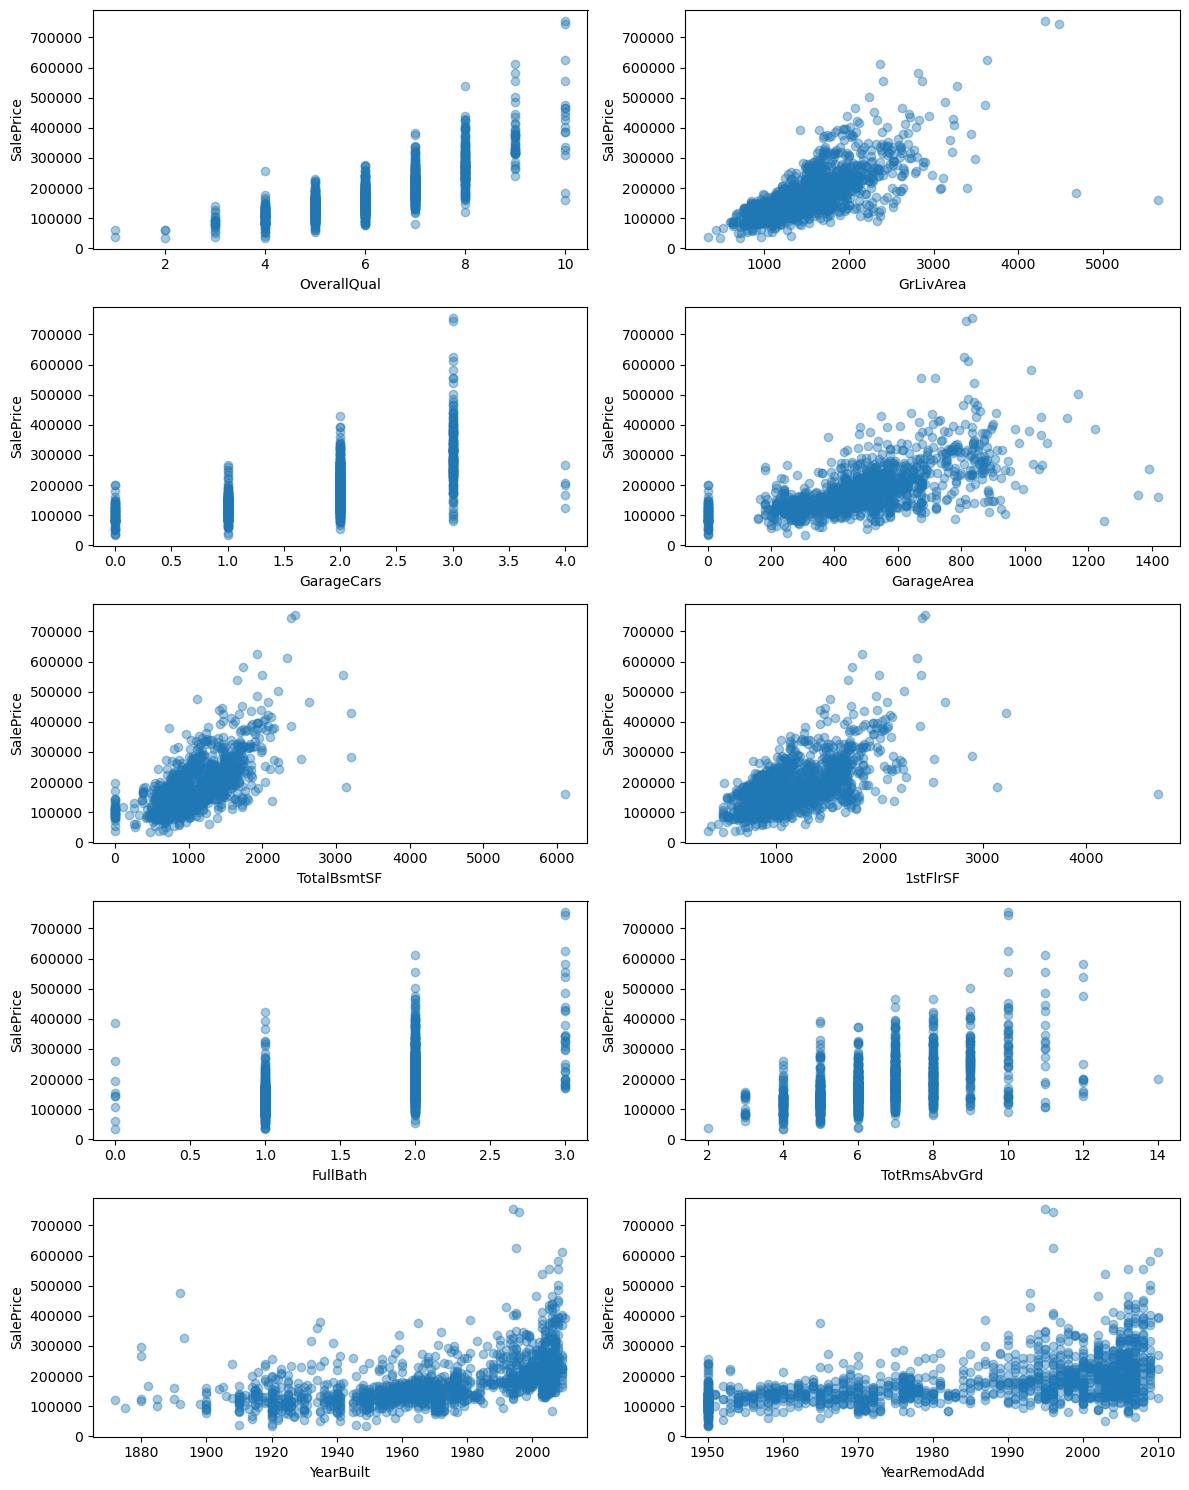

In [169]:
important_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
                      'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

fig, axs = plt.subplots(5, 2, figsize=(12, 15))

for i, feature in enumerate(important_features):
    row = i // 2
    col = i % 2
    axs[row, col].scatter(df[feature], df['SalePrice'], alpha=.4)
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()

In [170]:
casas_acima_limite = df[df['GrLivArea'] >= 4000]
display(casas_acima_limite)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


# Aprendizagem Supervisionada

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [172]:
# LINEAR REGRESSION

df_filtered_lr = df[important_features + ['SalePrice']]

X = df_filtered_lr[important_features]
y = df_filtered_lr['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print("Métricas de avaliação do modelo de regressão linear:")
print("Erro Médio Quadrático (MSE):", mse_lr)
print("Erro Absoluto Médio (MAE):", mae_lr)
print("Coeficiente de Determinação (R^2):", r2_lr)

Métricas de avaliação do modelo de regressão linear:
Erro Médio Quadrático (MSE): 1558239575.1510978
Erro Absoluto Médio (MAE): 24774.219519604827
Coeficiente de Determinação (R^2): 0.7968483304281087


In [173]:
# RANDOM FOREST 

df_filtered_rf = df[important_features + ['SalePrice']]

X = df_filtered_rf[important_features]
y = df_filtered_rf['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print("Métricas de avaliação do modelo de random forest:")
print("Erro Médio Quadrático (MSE):", mse_rf)
print("Erro Absoluto Médio (MAE):", mae_rf)
print("Coeficiente de Determinação (R^2):", r2_rf)

Métricas de avaliação do modelo de random forest:
Erro Médio Quadrático (MSE): 877299148.1199831
Erro Absoluto Médio (MAE): 19033.5179264514
Coeficiente de Determinação (R^2): 0.8856242714556324


In [174]:
# B. Regressão logistica (CLASSIFICAÇÃO)

df_filtered_to_lr = df[important_features + ['SalePrice']].copy()

df_filtered_to_lr['HighPrice'] = (df_filtered_to_lr['SalePrice'] > df_filtered_to_lr['SalePrice'].median()).astype(int)

X = df_filtered_to_lr[important_features]
y = df_filtered_to_lr['HighPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Métricas do modelo de regressão logística:")
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Revocação (Recall):", recall)
print("F1-Score:", f1)
print("Matriz de Confusão:")
print(confusion)

Métricas do modelo de regressão logística:
Acurácia: 0.8938356164383562
Precisão: 0.8623188405797102
Revocação (Recall): 0.9083969465648855
F1-Score: 0.8847583643122676
Matriz de Confusão:
[[142  19]
 [ 12 119]]


C:\Users\admte\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


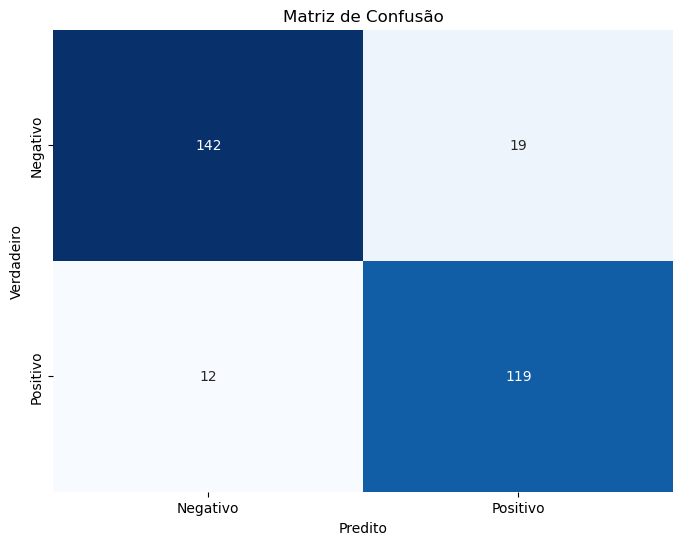

In [175]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.xticks([0.5, 1.5], ['Negativo', 'Positivo'])
plt.yticks([0.5, 1.5], ['Negativo', 'Positivo'])
plt.show()

# Aprendizagem não supervisionada:

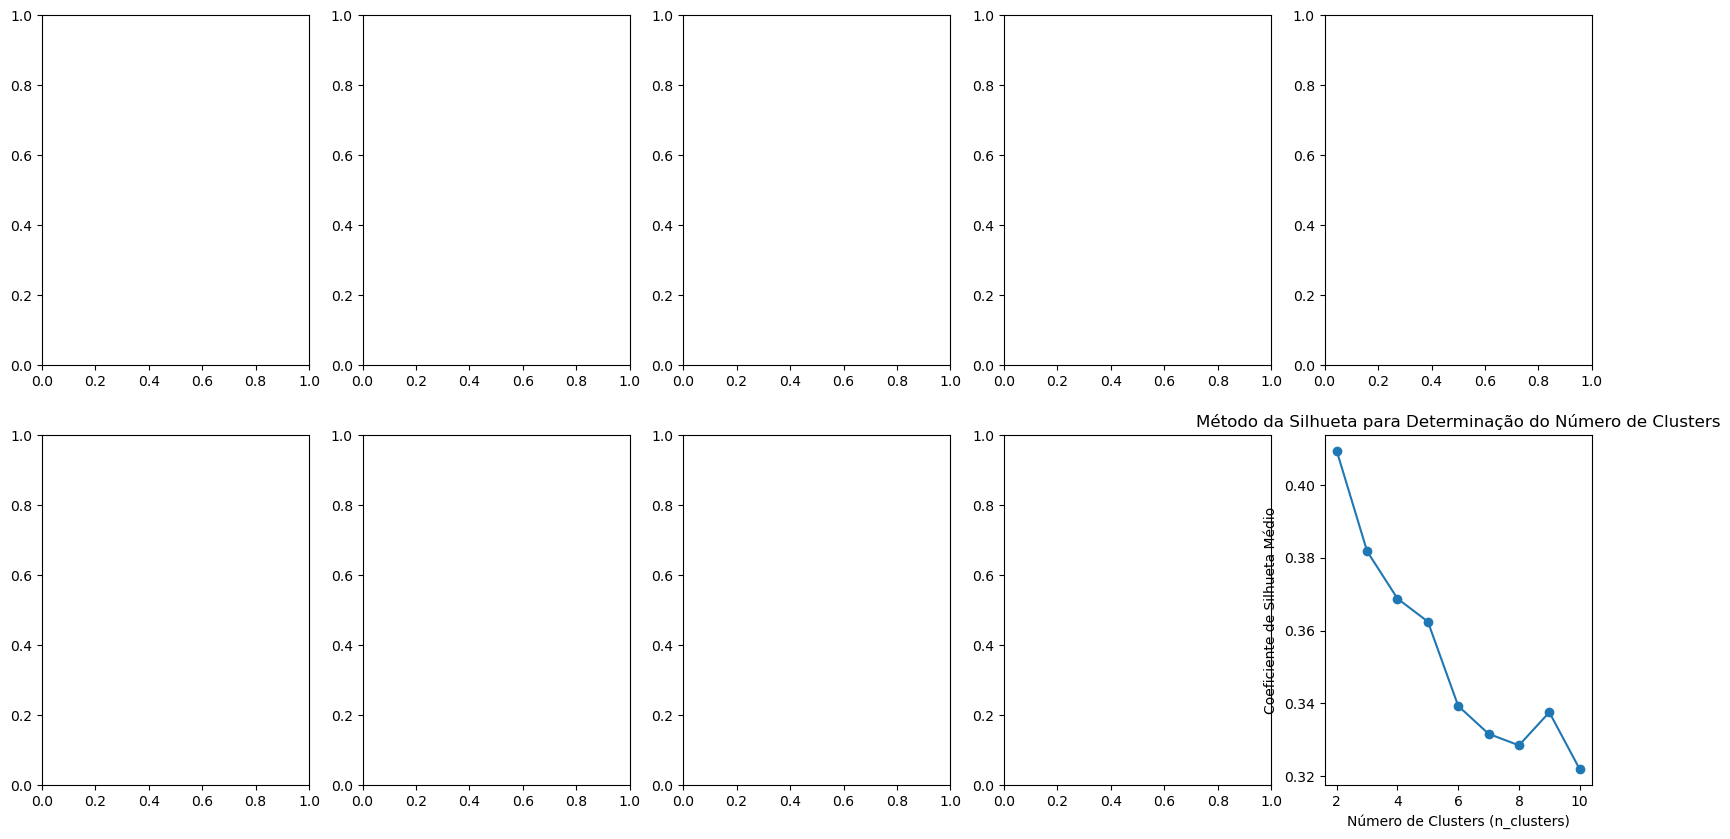

Número ideal de clusters método da silhueta: 2


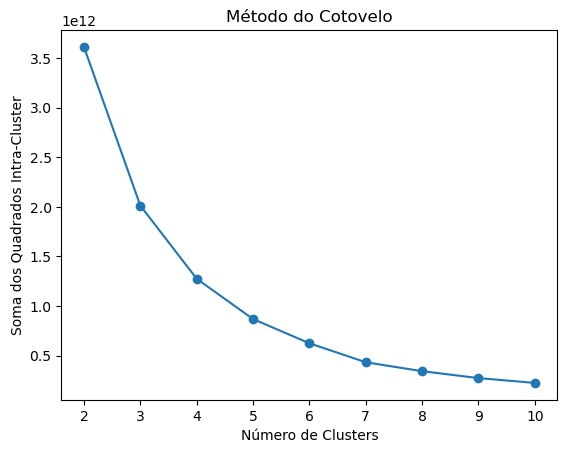

Coeficiente de Silhueta para OverallQual: 0.635274766583175
Coeficiente de Silhueta para GrLivArea: 0.6351983069949806
Coeficiente de Silhueta para GarageCars: 0.6352747776614228
Coeficiente de Silhueta para GarageArea: 0.6352556281794256
Coeficiente de Silhueta para TotalBsmtSF: 0.6352065738674961
Coeficiente de Silhueta para 1stFlrSF: 0.6352159814047462
Coeficiente de Silhueta para FullBath: 0.6352747813083289
Coeficiente de Silhueta para TotRmsAbvGrd: 0.635274746037346
Coeficiente de Silhueta para YearBuilt: 0.6352736041023034
Coeficiente de Silhueta para YearRemodAdd: 0.6352740418620858


<Figure size 640x480 with 0 Axes>

In [183]:
# A. Clusterização:

df_filtered_k_means = df[important_features + ['SalePrice']].copy()

fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# TESTANDO DIFERENTES VALORES PARA N_CLUSTERS E TENTANDO ENTENDER QUAL O MELHOR VALOR -> Método de Silhueta

silhouette_scores_test = []
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores_test.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores_test, marker='o')
plt.xlabel('Número de Clusters (n_clusters)')
plt.ylabel('Coeficiente de Silhueta Médio')
plt.title('Método da Silhueta para Determinação do Número de Clusters')
plt.show()

best_n_clusters = n_clusters_range[np.argmax(silhouette_scores_test)]
print("Número ideal de clusters método da silhueta:", best_n_clusters)

# TESTANDO DIFERENTES VALORES PARA N_CLUSTERS E TENTANDO ENTENDER QUAL O MELHOR VALOR -> Método do cotovelo

inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_filtered_k_means[important_features + ['SalePrice']])
    inertia.append(kmeans.inertia_)
    
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados Intra-Cluster')
plt.title('Método do Cotovelo')
plt.show()

#  Executando o algortimo KMEANS
silhouette_scores = []

for i, feature in enumerate(important_features):
    kmeans = KMeans(n_clusters=2, random_state=42)
    
    kmeans.fit(df_filtered_k_means[[feature, 'SalePrice']])
    
    labels = kmeans.labels_
    
    silhouette = silhouette_score(df_filtered_k_means[[feature, 'SalePrice']], labels)
    silhouette_scores.append(silhouette)
    
    axs[i // 5, i % 5].scatter(df_filtered_k_means[feature], df_filtered_k_means['SalePrice'], c=labels)
    axs[i // 5, i % 5].scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100)
    axs[i // 5, i % 5].set_xlabel(feature)
    axs[i // 5, i % 5].set_ylabel('SalePrice')
    axs[i // 5, i % 5].set_title('Clusterização K-means')
    
# Ajuste do layout dos subplots
plt.tight_layout()
    
# Imprimir os valores do Coeficiente de Silhueta
for i, feature in enumerate(important_features):
    print(f"Coeficiente de Silhueta para {feature}: {silhouette_scores[i]}")


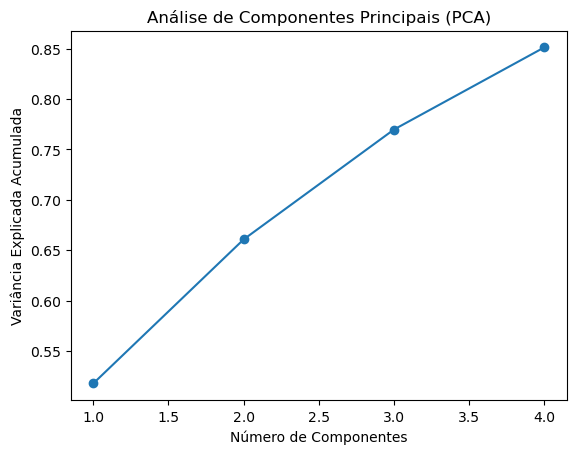

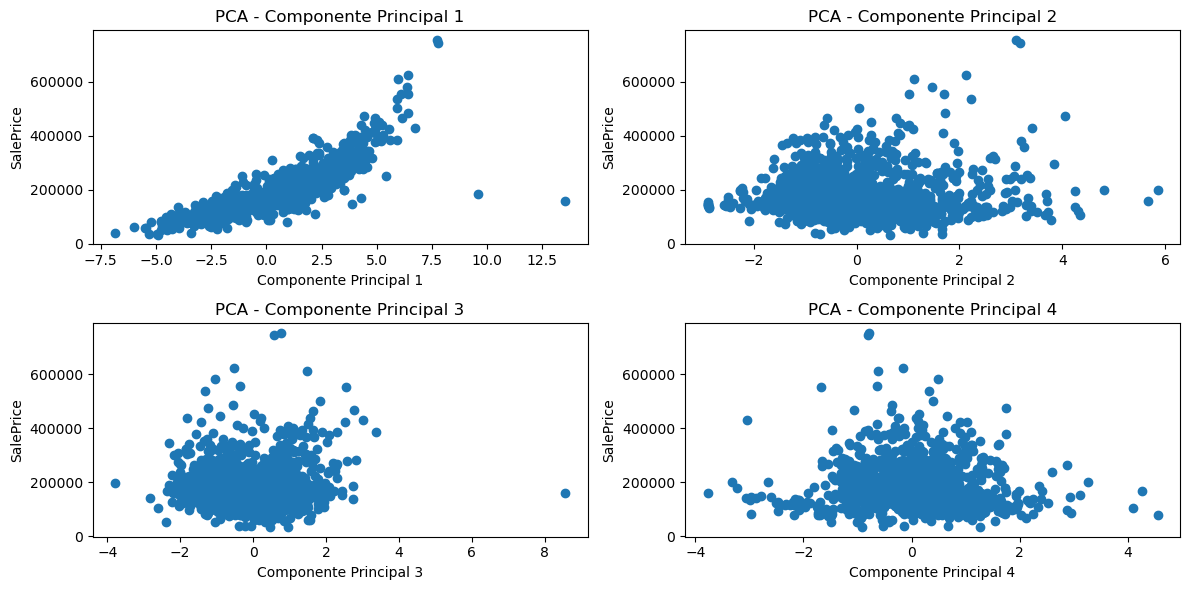

In [177]:
# B. Redução de dimensionalidade:

df_filtered_PCA = df[important_features + ['SalePrice']].copy()

scaler = StandardScaler()
df_filtered_scaled = scaler.fit_transform(df_filtered_PCA[important_features])

pca = PCA(n_components=min(len(important_features), 4))

pca_result = pca.fit_transform(df_filtered_scaled)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Análise de Componentes Principais (PCA)')
plt.show()

n_components = min(len(important_features), 4)
plt.figure(figsize=(12, 6))
for i in range(int(n_components)):
    plt.subplot(2, int(np.ceil(n_components/2)), i+1)
    plt.scatter(pca_result[:, i], df['SalePrice'])
    plt.xlabel(f'Componente Principal {i+1}')
    plt.ylabel('SalePrice')
    plt.title(f'PCA - Componente Principal {i+1}')
plt.tight_layout()
plt.show()

In [178]:
# df_categorical = df.select_dtypes(exclude=['int64', 'float64'])

# Aplicar a codificação one-hot nas variáveis categóricas
# df_encoded = pd.get_dummies(df_categorical)

# Exibir o dataframe com as variáveis categóricas codificadas
# display(df_encoded.head())

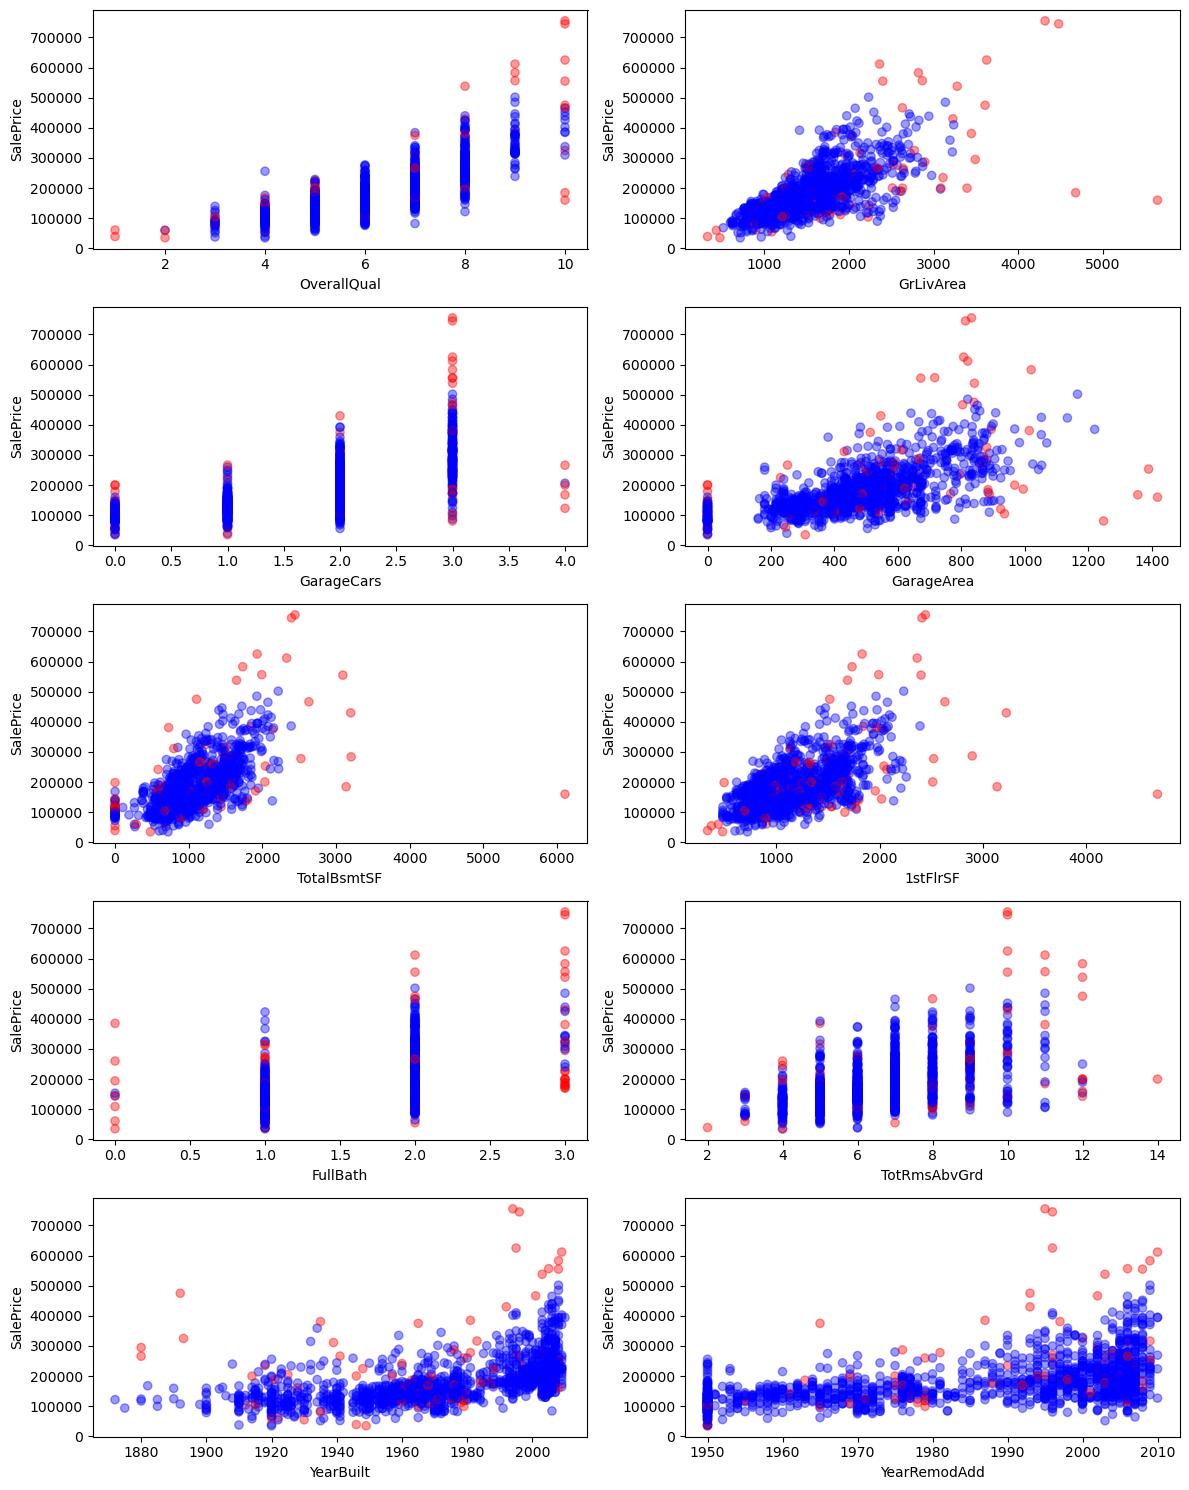

In [179]:
# D. Análise de outlier:

df_outlier = df[important_features + ['SalePrice']].copy()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_outlier)

lof = LocalOutlierFactor(n_neighbors=50) 
outlier_scores = lof.fit_predict(df_scaled)

df_outlier['OutlierScore'] = outlier_scores

outliers = df_outlier[df_outlier['OutlierScore'] == -1]

df_concat_lof = pd.concat([df_outlier, outliers]).drop_duplicates()
# 
fig, axs = plt.subplots(5, 2, figsize=(12, 15))

for i, feature in enumerate(important_features):
    row = i // 2
    col = i % 2
    colors = ['blue' if outlierValue == 1 else 'red' for outlierValue in df_concat_lof['OutlierScore']]
    axs[row, col].scatter(df_concat_lof[feature], df_concat_lof['SalePrice'], alpha=.4, c=colors)
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()

In [180]:
# 5. Métricas de avaliação e comparação:

